## The goal of this project is to analyze a wine quality dataset and build a predictive model that can accurately classify the quality of wines based on various physicochemical characteristics. We will explore different machine learning algorithms and compare their performance to determine the most effective model for predicting wine quality

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('WineQt.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [4]:
data.shape

(1143, 13)

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
data.describe() #DESCRIPTIVE STATS

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
data.drop(columns=['Id'], inplace=True)

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


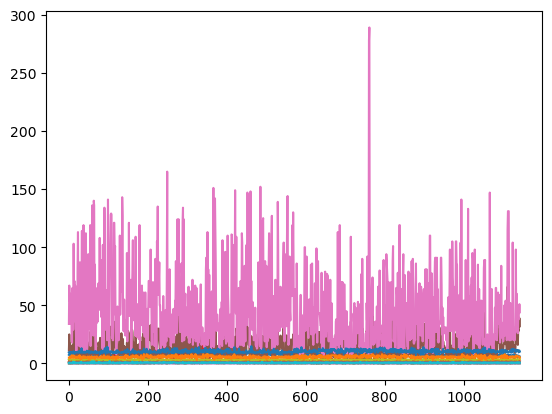

In [9]:
import matplotlib.pyplot as plt
plt.plot(data)

<Axes: >

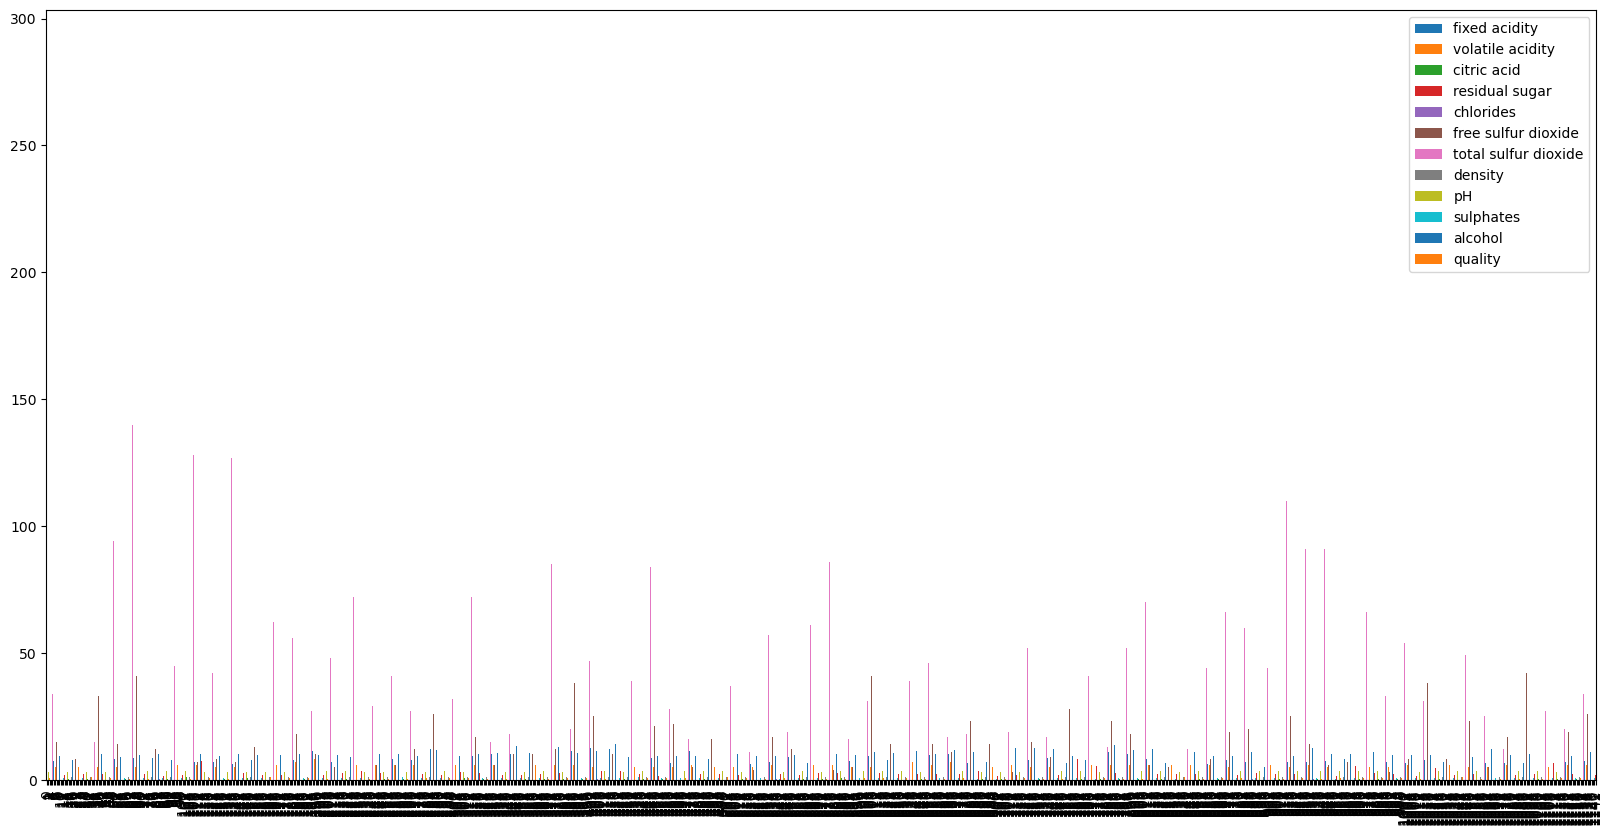

In [10]:
data.plot(kind="bar",figsize=(20,10))

In [11]:
x=data.drop('quality',axis=1)
y=data[['quality']]

In [12]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [14]:
x.shape

(1143, 11)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [17]:
x=sc.fit_transform(x)

In [18]:
# x

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(914, 11)
(229, 11)
(914, 1)
(229, 1)


## Decision Tree Algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [23]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
pred=df.predict(x_test)

In [25]:
pred

array([5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 7, 5,
       6, 6, 5, 6, 6, 6, 4, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 7, 6, 5, 6, 5, 5, 7, 5, 6, 6, 5, 5, 4, 6, 6, 5, 5, 7, 5,
       7, 5, 6, 7, 5, 6, 6, 7, 6, 7, 8, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5,
       5, 6, 6, 7, 5, 5, 4, 5, 6, 5, 5, 6, 4, 6, 8, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 8, 6, 6, 5, 5, 6, 7, 6, 5, 6, 6, 7, 6, 7, 6, 5, 5, 8, 6,
       5, 5, 5, 6, 5, 7, 6, 6, 5, 4, 8, 7, 6, 6, 8, 6, 8, 5, 5, 6, 6, 6,
       4, 6, 5, 8, 5, 7, 5, 6, 5, 5, 6, 6, 7, 7, 6, 5, 5, 6, 5, 6, 7, 6,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 4, 6, 6, 5, 6, 6, 6, 5, 6, 5,
       4, 5, 7, 6, 5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 6, 6, 5, 4, 6, 6, 5], dtype=int64)

In [26]:
y_test

,quality
946,5
142,4
934,6
625,6
124,5
...,...
651,5
122,6
713,7
545,5


In [27]:
predict=df.predict(x_train)

In [28]:
y_train

,quality
1050,5
175,6
198,7
535,5
81,6
...,...
1033,7
763,6
835,5
559,5


## metrics

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [30]:
accuracy=accuracy_score(y_train,predict)
conmat=confusion_matrix(y_train,predict)

In [31]:
print(accuracy)
print(conmat)

1.0
[[  5   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 383   0   0   0]
 [  0   0   0 370   0   0]
 [  0   0   0   0 116   0]
 [  0   0   0   0   0  14]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.14      0.12         7
           5       0.76      0.68      0.72       100
           6       0.53      0.58      0.55        92
           7       0.48      0.41      0.44        27
           8       0.12      0.50      0.20         2

    accuracy                           0.59       229
   macro avg       0.33      0.38      0.34       229
weighted avg       0.61      0.59      0.59       229



C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [36]:
pred=lr.predict(x_test)

In [37]:
pred

array([5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       7, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 7, 7, 6, 5, 5, 6, 5, 5, 5, 5, 4, 6, 7, 5, 6, 6, 5, 6, 5, 5,
       5, 6, 6, 7, 5, 6, 5, 7, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 7, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 7, 5, 5], dtype=int64)

In [38]:
y_test

,quality
946,5
142,4
934,6
625,6
124,5
...,...
651,5
122,6
713,7
545,5


## metrics

In [39]:
accuracy_score(y_test,pred)

0.6462882096069869

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.84      0.79       100
           6       0.59      0.62      0.61        92
           7       0.37      0.26      0.30        27
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.28      0.29      0.28       229
weighted avg       0.61      0.65      0.62       229



C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## knn algorithm

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier()

In [43]:
knn.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [44]:
pred=knn.predict(x_test)

In [45]:
pred

array([5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 7, 6, 5, 5, 6, 5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5,
       7, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 6, 6, 5,
       6, 5, 5, 6, 5, 6, 5, 7, 5, 7, 5, 5, 5, 7, 7, 5, 6, 6, 5, 6, 7, 6,
       5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 5, 7, 5, 6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 6, 7, 5, 5], dtype=int64)

In [46]:
y_test

,quality
946,5
142,4
934,6
625,6
124,5
...,...
651,5
122,6
713,7
545,5


## metrics

In [47]:
accuracy_score(y_test,pred)

0.5633187772925764

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.71      0.68       100
           6       0.52      0.54      0.53        92
           7       0.36      0.30      0.33        27
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.25      0.26      0.26       229
weighted avg       0.53      0.56      0.55       229



C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## naive bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [50]:
nb.fit(x_train,y_train) 

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [51]:
pred = nb.predict(x_test) 

In [52]:
pred

array([5, 4, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6,
       5, 5, 6, 6, 7, 6, 5, 7, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 6, 7, 6, 7, 7, 7, 5, 6, 5, 5, 6, 6, 7, 5, 4, 3,
       5, 6, 7, 7, 4, 5, 6, 6, 5, 5, 5, 5, 4, 6, 8, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 7, 5, 6, 5, 7, 5, 6, 6, 5, 5, 6, 7, 6, 6, 7, 5, 6, 7, 6,
       5, 5, 3, 7, 5, 7, 5, 5, 6, 4, 7, 8, 6, 5, 6, 7, 8, 5, 6, 6, 6, 6,
       5, 5, 6, 7, 6, 4, 6, 7, 5, 6, 5, 5, 7, 5, 7, 6, 5, 5, 5, 6, 6, 7,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 7, 6, 5, 6, 7, 5, 5, 6,
       5, 6, 6, 6, 6, 7, 4, 5, 5, 4, 5, 5, 7, 6, 7, 7, 6, 5, 6, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 8, 5, 5], dtype=int64)

In [53]:
y_test

,quality
946,5
142,4
934,6
625,6
124,5
...,...
651,5
122,6
713,7
545,5


# metrics

In [54]:
accuracy_score(y_test,pred)

0.6069868995633187

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.29      0.27         7
           5       0.72      0.73      0.72       100
           6       0.62      0.52      0.56        92
           7       0.43      0.56      0.48        27
           8       0.25      0.50      0.33         2

    accuracy                           0.61       229
   macro avg       0.38      0.43      0.40       229
weighted avg       0.62      0.61      0.61       229



## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [58]:
rf.fit(x_train,y_train)

C:\Users\pavan\AppData\Local\Temp\ipykernel_14496\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
pred=rf.predict(x_test)

In [60]:
pred

array([5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       7, 5, 6, 7, 5, 5, 6, 7, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 4,
       5, 5, 5, 7, 5, 5, 5, 6, 6, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 7, 6, 5, 6, 7, 5, 5, 6,
       5, 5, 6, 7, 5, 7, 7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 6, 6, 5, 6, 5, 7, 5, 5], dtype=int64)

In [61]:
y_test

,quality
946,5
142,4
934,6
625,6
124,5
...,...
651,5
122,6
713,7
545,5


In [62]:
predict=rf.predict(x_train)

In [63]:
predict

array([5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 7, 5, 6,
       7, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6,
       5, 6, 5, 7, 5, 7, 6, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6,
       3, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 6,
       6, 6, 5, 4, 5, 5, 5, 6, 6, 5, 5, 7, 7, 4, 5, 7, 6, 6, 5, 6, 7, 6,
       5, 8, 6, 7, 7, 6, 7, 5, 7, 5, 5, 6, 7, 5, 5, 7, 6, 8, 5, 7, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 8, 5, 6, 6, 5, 7,
       5, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 4, 7, 5, 5, 7, 6,
       6, 5, 5, 6, 4, 5, 8, 5, 5, 6, 6, 5, 6, 4, 7, 8, 7, 6, 4, 7, 5, 6,
       7, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 6, 6,
       6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 5, 5, 5, 5,
       5, 6, 5, 7, 5, 5, 5, 5, 7, 5, 5, 8, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5,
       6, 7, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6,

In [64]:
y_train

,quality
1050,5
175,6
198,7
535,5
81,6
...,...
1033,7
763,6
835,5
559,5


In [65]:
accuracy=accuracy_score(y_train,predict)
print(accuracy)

0.9824945295404814


# The accuracy got is around 98 percent !!!

In [69]:
from sklearn import metrics

## SVM algorithm

In [70]:
from sklearn.svm import SVC 

In [71]:
model=SVC()

In [72]:
MSVC = model.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
pred = MSVC.predict(x_test)

In [74]:
metrics.classification_report(pred,y_test)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         0\n           4       0.00      0.00      0.00         0\n           5       0.78      0.75      0.76       104\n           6       0.74      0.61      0.67       112\n           7       0.30      0.62      0.40        13\n           8       0.00      0.00      0.00         0\n\n    accuracy                           0.67       229\n   macro avg       0.30      0.33      0.31       229\nweighted avg       0.73      0.67      0.70       229\n'

In [75]:
metrics.confusion_matrix(pred,y_test)

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 1,  4, 78, 19,  2,  0],
       [ 0,  3, 22, 68, 17,  2],
       [ 0,  0,  0,  5,  8,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

In [76]:
metrics.accuracy_score(pred,y_test)

0.6724890829694323

In [77]:
from sklearn.svm import SVC

model= SVC()

In [78]:
model.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [79]:
y_predict=model.predict(x_test)
y_predict

array([5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5,
       5, 6, 6, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 7, 6,
       5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 6, 6, 7, 5, 5], dtype=int64)

## metrics

In [80]:
accuracy_score(y_test,y_predict)

0.6724890829694323

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.75      0.78      0.76       100
           6       0.61      0.74      0.67        92
           7       0.62      0.30      0.40        27
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.33      0.30      0.31       229
weighted avg       0.64      0.67      0.65       229



C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters={
    'kernel':['rbf'],
    'C':[0.1,0.5,1.0],
    'gamma':[0.01,0.0001]
}
clf = GridSearchCV(SVC(), param_grid=parameters,verbose=2)

clf.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ....................C=1.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.0, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=1.0, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'gamma': [0.01, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [84]:
clf.best_score_

0.5733501471206389

In [85]:
clf.best_params_

{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}

In [86]:
model2= SVC(C=0.5, gamma=0.01, kernel='rbf')

model2.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5, gamma=0.01)

In [87]:
y_predict=model2.predict(x_test)

In [88]:
accuracy_score(y_test,y_predict)

0.6550218340611353

In [89]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.86      0.77       100
           6       0.60      0.70      0.65        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.55      0.66      0.60       229



C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
parameters={
    'kernel':['rbf'],
    'C':[0.1,0.5,1.0],
    'gamma':[0.01,0.0001]
}
RCV  = RandomizedSearchCV(estimator=SVC(),param_distributions=parameters,cv=10,n_iter=4,verbose=2)


In [92]:
RCV.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.5, gamma=0.0001, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.5, gamma=0.01, kernel=rbf; total time=   0.0s


C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=4,
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'gamma': [0.01, 0.0001],
                                        'kernel': ['rbf']},
                   verbose=2)

In [93]:
RCV.best_score_

0.5711419015766842

In [94]:
RCV.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 0.5}

In [95]:
model3= SVC(C=1, gamma=0.0001, kernel='rbf')

model3.fit(x_train,y_train)

C:\Users\pavan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.0001)

In [96]:
y_predict2=model3.predict(x_test)

In [97]:
accuracy_score(y_test,y_predict2)

0.4366812227074236

In [98]:
y_predict2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

## This wine quality prediction project employed diverse machine learning algorithms, with Random Forest with (98 percent) accuracy emerging as the top performer. Key factors like alcohol and volatile acidity were identified as critical determinants of quality. The insights gained demonstrate the value of machine learning in the wine industry and motivate future research to refine models and expand understanding.

## Thank you for your time and attention